In [1]:
exec(open('ProtamineAnalysis.py').read())
exec(open('GenerateDatasets.py').read())

#####################################
#            Alignments             #
#                                   #
# Conserved positions marked with * #
#####################################
Eutherian P1 Sperm Protamines
                         10         20         30         40         50         60
                 *    **          *            *        **           **          *     
HSP1_CAPHI       MARYRCCLTH --SRSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVVRC TRQ- 
HSP1_SHEEP       MARYRCCLTH --SRSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVVRC TRQ- 
HSP1_BOVIN       MARYRCCLTH --SGSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVIRC TRQ- 
HSP1_PIG         MARYRCCRSH --SRSRCR-P ---R-RRRCR -RRRRRCCPR --RRR-AVCC RRY--TVIRC RRC- 
HSP1_HORSE       MARYRCCRSQ --SQSRCR-R ---RRRRRCR -RRRRRSVRQ --RR---VCC RRY--TVLRC RRRR 
HSP1_ORCOR       MARNR-CRSP --SQSRCR-R ---P-RRRCR --RRIRCCRR --QR--RVCC RRY--TTTRC ARQ- 
HSP1_MOUSE       MARYRCCRSK --SRSRCR-R ---R-RRRCR -RRRRRCCRR --RR--RRCC RRR

PRTB_ACIGU       --ARRRRRSS RPQRRRRR-- -----RRHGR RRRGRR 
PRTB_ACIST       --ARRRRRSS RPQRRRRR-- -----RRHGR RRRGRR 
PRTY1_CLUHA      --ARRRRSSS RPIRRRRPRR RT---TRRRR AGRRRR 
PRTY1_CLUPA      --ARRRRSSS RPIRRRRPRR RT---TRRRR AGRRRR 
PRT1_ESOLU       -PRRRRASSG RPVRRRRRP- KMS--RRRRR GGRRRR 
PRTZ_CLUPA       ARRRRSRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRTZ_CLUHA       ARRRRSRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRT4_ONCMY       -MPRRRR-AS RRIRRRRRP- RVS--RRRRG GRRRRR 
PRTY2_CLUPA      -PRRRTRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRTY2_CLUHA      -PRRRTRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRT3A_ONCMY      -PRRRRRSSS RPIRRRRRP- RVS--RRRRR GGRRRR 
PRTIB_ONCMY      PRRRRRRSSS RPIRRRRPR- RVS--RRRRR GGRRRR 
PRT1B_ONCMY      -MPRRRR-AS RRIRRRRRP- RVS--RRRRR GGRRRR 
PRT1A_ONCMY      -MPRRRR-AS RRVRRRRRP- RVS--RRRRR GGRRRR 
PRTC3_ONCMY      -MPRRRR-AS RPVRRRRRP- RVS--RRRRR GGRRRR 
PRT2C_ONCMY      -MPRRRRSSR RPVRRRRRP- RVSR-RRRRR GGRRRR 
PRT14_ONCMY      -MPRRRRSSR PPVRRRRRP- RVSR-RRRRR GGRRRR 
PRT2_ONCMY    

FileNotFoundError: [Errno 2] No such file or directory: '/usr/bin/muscle3.8.31_i86linux64': '/usr/bin/muscle3.8.31_i86linux64'

In [ ]:
def count_charge(txt):
    result = 0
    for char in txt:
        if char=='K' or char=='R' or char=='H':
            result += 1
        if char=='D' or char=='E':
            result = result - 1
    return result

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
def count_chars(txt):
    result = 0
    for char in txt:
        if char=='K':
            result += 1     
    return result
lys_length=[]
lys_table=pd.DataFrame(columns=['Fish_sequence','lys_total_blocks',
                                'sum(block_length)'])
for l in range(0,len(fish_list)):
    lys_length_temp=[]
    i=0
    j=0
    k=1
    protamine_sequence=fish_list[l]['_SQ']
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='K' and protamine_sequence[j+1]=='K':
            count_arg=0
            i=j
            while protamine_sequence[i]=='K':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                    break
            lys_length.append(count_arg)
            lys_length_temp.append(count_arg)
            j=i
        elif protamine_sequence[j]=='K' and protamine_sequence[j+1]!='K':
            lys_length.append(1)
            lys_length_temp.append(1)
            j=j+1
        else:
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='K' and protamine_sequence[len(protamine_sequence)-2]!='K':
        lys_length.append(1)
        lys_length_temp.append(1)
    if sum(lys_length_temp)!=count_chars(protamine_sequence):
        print(sum(lys_length_temp),count_chars(protamine_sequence))
    lys_table.loc[len(lys_table.index)]=[protamine_sequence,len(lys_length_temp),
                                        sum(lys_length_temp)]
fig,ax=plt.subplots(figsize=(10,5))
bins=np.arange(min(lys_length),max(lys_length)+2,1)
lys_length_hist=ax.hist(lys_length,
                    bins=bins,color='blue',
                    label='Length of Lysine blocks',
                    alpha=0.5,edgecolor='black',
               density=False);
#ax.bar(np.arange(1,len(lys_length)+1,1),lys_length,
#       alpha=0.5,edgecolor='black')
ax.set_title('Fish Protamines: Lysine Lengths',fontsize=20)
ax.set_ylabel('Number',fontsize=15)
ax.set_xlabel('Length of Lysine Stretch',fontsize=15)
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0],bins[-1])
bins_labels(bins,fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

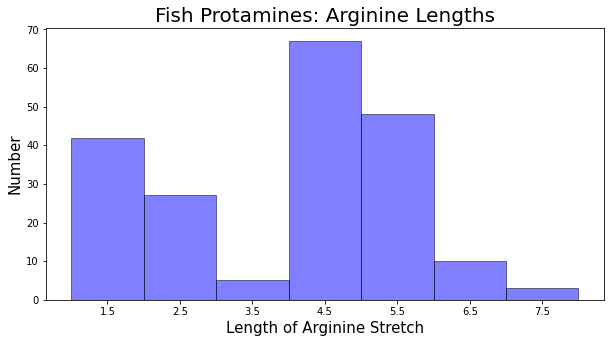

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
def count_chars(txt):
    result = 0
    for char in txt:
        if char=='R':
            result += 1     
    return result
arg_length=[]
arg_table=pd.DataFrame(columns=['Fish_sequence','total_blocks','average_block_length','max_block_length',
                                'sum(block_length)*sequence_length'])
for l in range(0,len(fish_list)):
    arg_length_temp=[]
    max_arg_length_temp=[]
    i=0
    j=0
    k=1
    protamine_sequence=fish_list[l]['_SQ']
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='R' and protamine_sequence[j+1]=='R':
            count_arg=0
            i=j
            while protamine_sequence[i]=='R':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                    break
            arg_length.append(count_arg)
            arg_length_temp.append(count_arg)
            j=i
        elif protamine_sequence[j]=='R' and protamine_sequence[j+1]!='R':
            arg_length.append(1)
            arg_length_temp.append(1)
            j=j+1
        else:
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='R' and protamine_sequence[len(protamine_sequence)-2]!='R':
        arg_length.append(1)
        arg_length_temp.append(1)
    if sum(arg_length_temp)!=count_chars(protamine_sequence):
        print(sum(arg_length_temp),count_chars(protamine_sequence))
    max_arg_length_temp.append(max(arg_length_temp))
    arg_table.loc[len(arg_table.index)]=[protamine_sequence,len(arg_length_temp),
                                         format(sum(arg_length_temp)/len(arg_length_temp),".2f"),max_arg_length_temp[0],
                                        sum(arg_length_temp)*len(protamine_sequence)]
fig,ax=plt.subplots(figsize=(10,5))
bins=np.arange(min(arg_length),max(arg_length)+2,1)
arg_length_hist=ax.hist(arg_length,
                    bins=bins,color='blue',
                    label='Length of Arginine blocks',
                    alpha=0.5,edgecolor='black',
               density=False);
#ax.bar(np.arange(1,len(arg_length)+1,1),arg_length,
#       alpha=0.5,edgecolor='black')
ax.set_title('Fish Protamines: Arginine Lengths',fontsize=20)
ax.set_ylabel('Number',fontsize=15)
ax.set_xlabel('Length of Arginine Stretch',fontsize=15)
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0],bins[-1])
bins_labels(bins,fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()

In [3]:
arg_table.sort_values(by=['average_block_length'],ascending=True)

,Fish_sequence,total_blocks,average_block_length,max_block_length,sum(block_length)*sequence_length
32,PRRRTRRASRPVRRRRPRRVSRRRRARRRR,7,2.86,4,600
12,PRRRTRRASRPVRRRRPRRVSRRRRARRRR,7,2.86,4,600
33,ARRRRSRRASRPVRRRRPRRVSRRRRARRRR,7,3.00,4,651
19,PRRRRHAARPVRRRRRTRRSSRVHRRRRAVRRRR,7,3.00,5,714
18,MRRQASLPARRRRRVRRTRVVRRRRRVGRRRH,6,3.00,5,576
15,ARRRRSRRASRPVRRRRPRRVSRRRRARRRR,7,3.00,4,651
31,ARRRRSSSRPIRRRRPRRRTTRRRRAGRRRR,6,3.33,4,620
30,ARRRRSSSRPIRRRRPRRRTTRRRRAGRRRR,6,3.33,4,620
28,MPRRRRASRPVRRRRRPRVSRRRRRGGRRRR,6,3.33,5,620
23,PRRRRSSSRPVRRRRARRVSRRRRRRGGRRRR,6,3.50,6,672


Mean fish protamine # of arginine blocks= 5.9411764705882355 with stdev= 0.8381062852220592


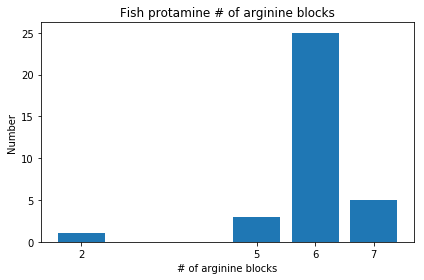

In [7]:
labels, counts = np.unique([int(element) for i,element in enumerate(arg_lys_table.arg_total_blocks.values)],
                           return_counts=True,)
plt.bar(labels,counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('# of arginine blocks')
plt.ylabel('Number')
plt.title('Fish protamine # of arginine blocks')
plt.tight_layout()
print("Mean fish protamine # of arginine blocks=",np.array([int(element) for i,
                                        element in enumerate(arg_lys_table.arg_total_blocks.values)]).mean(),"with stdev=",
      np.array([int(element) for i,element in enumerate(arg_lys_table.arg_total_blocks.values)]).std())

,Fish_sequence,lys_total_blocks,arg_total_blocks,total_charge,charge_density
25,ARRRRRHASTKLKRRRRRRRHGKKSHK,4,2,20,0.740741
26,ARRRRRSSRPQRRRRRRRHGRRRRGRR,0,5,20,0.740741
27,ARRRRRSSRPQRRRRRRRHGRRRRGRR,0,5,20,0.740741
32,PRRRTRRASRPVRRRRPRRVSRRRRARRRR,0,7,20,0.666667
12,PRRRTRRASRPVRRRRPRRVSRRRRARRRR,0,7,20,0.666667
33,ARRRRSRRASRPVRRRRPRRVSRRRRARRRR,0,7,21,0.677419
15,ARRRRSRRASRPVRRRRPRRVSRRRRARRRR,0,7,21,0.677419
9,MPRRRRASRRIRRRRRPRVSRRRRGGRRRRR,0,6,21,0.677419
28,MPRRRRASRPVRRRRRPRVSRRRRRGGRRRR,0,6,20,0.645161
4,MPRRRRASRRIRRRRRPRVSRRRRRGGRRRR,0,6,21,0.677419


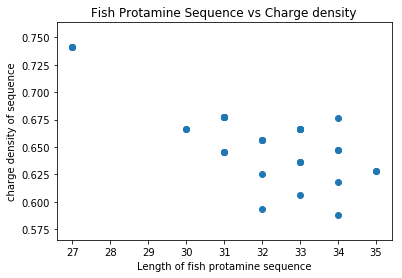

In [6]:
fish_sequence_length=[]
fish_sequence_charge=[]
for sequence in lys_table.Fish_sequence.values:
    fish_sequence_length.append(len(sequence))
    fish_sequence_charge.append(count_charge(sequence))
arg_lys_table=lys_table.iloc[:,:2]
#arg_lys_table=lys_table.copy()
#arg_lys_table=arg_lys_table.drop_duplicates(subset=['Fish_sequence'])
#arg_lys_table=arg_lys_table.iloc[:,:2]
arg_lys_table['arg_total_blocks']=arg_table.total_blocks.values
fish_sequence_length=[]
for sequence in arg_lys_table.Fish_sequence.values:
    fish_sequence_length.append(len(sequence))
arg_lys_table['sequence_length']=fish_sequence_length
arg_lys_table['total_charge']=fish_sequence_charge
arg_lys_table['charge_density']=arg_lys_table['total_charge']/arg_lys_table['sequence_length']
plt.scatter(arg_lys_table.sequence_length.values,arg_lys_table.charge_density.values)
plt.xlabel('Length of fish protamine sequence')
plt.ylabel('charge density of sequence')
plt.title('Fish Protamine Sequence vs Charge density')
arg_lys_table.sort_values(by=['sequence_length'],ascending=True).drop('sequence_length',axis=1)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

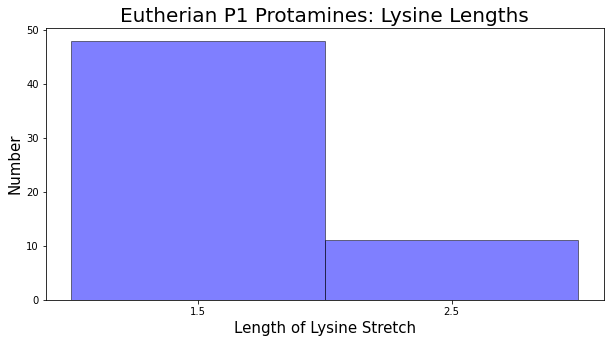

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
def count_chars(txt):
    result = 0
    for char in txt:
        if char=='K':
            result += 1     
    return result
lys_length=[]
lys_table=pd.DataFrame(columns=['P1_sequence','lys_total_blocks',
                                'sum(block_length)'])
for l in range(0,len(e_p1_list)):
    lys_length_temp=[]
    i=0
    j=0
    k=1
    protamine_sequence=e_p1_list[l]['_SQ']
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='K' and protamine_sequence[j+1]=='K':
            count_arg=0
            i=j
            while protamine_sequence[i]=='K':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                    break
            lys_length.append(count_arg)
            lys_length_temp.append(count_arg)
            j=i
        elif protamine_sequence[j]=='K' and protamine_sequence[j+1]!='K':
            lys_length.append(1)
            lys_length_temp.append(1)
            j=j+1
        else:
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='K' and protamine_sequence[len(protamine_sequence)-2]!='K':
        lys_length.append(1)
        lys_length_temp.append(1)
    if sum(lys_length_temp)!=count_chars(protamine_sequence):
        print(sum(lys_length_temp),count_chars(protamine_sequence))
    lys_table.loc[len(lys_table.index)]=[protamine_sequence,len(lys_length_temp),
                                        sum(lys_length_temp)]
fig,ax=plt.subplots(figsize=(10,5))
bins=np.arange(min(lys_length),max(lys_length)+2,1)
lys_length_hist=ax.hist(lys_length,
                    bins=bins,color='blue',
                    label='Length of Lysine blocks',
                    alpha=0.5,edgecolor='black',
               density=False);
#ax.bar(np.arange(1,len(lys_length)+1,1),lys_length,
#       alpha=0.5,edgecolor='black')
ax.set_title('Eutherian P1 Protamines: Lysine Lengths',fontsize=20)
ax.set_ylabel('Number',fontsize=15)
ax.set_xlabel('Length of Lysine Stretch',fontsize=15)
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0],bins[-1])
bins_labels(bins,fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()

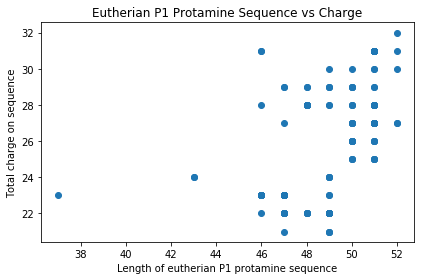

In [13]:
def count_charge(txt):
    result = 0
    for char in txt:
        if char=='K' or char=='R' or char=='H':
            result += 1
        if char=='D' or char=='E':
            result = result - 1
    return result
p1_sequence_length=[]
p1_sequence_charge=[]
for sequence in lys_table.P1_sequence.values:
    p1_sequence_length.append(len(sequence))
    p1_sequence_charge.append(count_charge(sequence))
plt.scatter(p1_sequence_length,p1_sequence_charge)
plt.xlabel('Length of eutherian P1 protamine sequence')
plt.ylabel('Total charge on sequence')
plt.title('Eutherian P1 Protamine Sequence vs Charge')
plt.tight_layout()

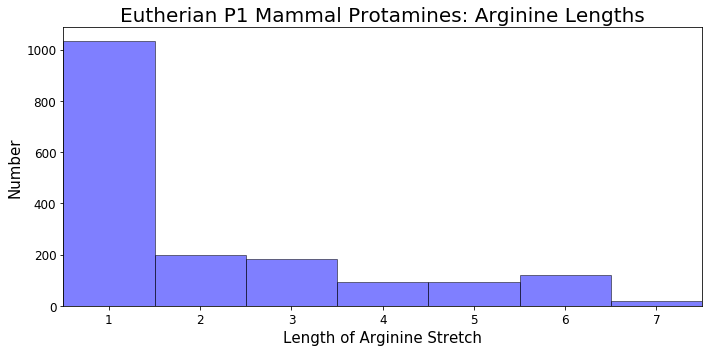

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
def count_chars(txt):
    result = 0
    for char in txt:
        if char=='R':
            result += 1     
    return result
arg_length=[]
arg_table=pd.DataFrame(columns=['P1_sequence','total_blocks','average_block_length','three_block_length','max_block_length'])
for l in range(0,len(e_p1_list)):
    arg_length_temp=[]
    max_arg_length_temp=[]
    three_arg_length_temp=[]
    i=0
    j=0
    k=1
    protamine_sequence=e_p1_list[l]['_SQ']
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='R' and protamine_sequence[j+1]=='R':
            count_arg=0
            i=j
            while protamine_sequence[i]=='R':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                    break
            arg_length.append(count_arg)
            arg_length_temp.append(count_arg)
            j=i
        elif protamine_sequence[j]=='R' and protamine_sequence[j+1]!='R':
            arg_length.append(1)
            arg_length_temp.append(1)
            j=j+1
        else:
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='R' and protamine_sequence[len(protamine_sequence)-2]!='R':
        arg_length.append(1)
        arg_length_temp.append(1)
    if sum(arg_length_temp)!=count_chars(protamine_sequence):
        print(sum(arg_length_temp),count_chars(protamine_sequence))
    max_arg_length_temp.append(max(arg_length_temp))
    three_arg_length_temp.append(arg_length_temp.count(3))
    arg_table.loc[len(arg_table.index)]=[protamine_sequence,len(arg_length_temp),
                                         sum(arg_length_temp)/len(arg_length_temp),three_arg_length_temp[0],max_arg_length_temp[0]]
fig,ax=plt.subplots(figsize=(10,5))
bins=np.arange(min(arg_length),max(arg_length)+2,1)
arg_length_hist=ax.hist(arg_length,
                    bins=bins,color='blue',
                    label='Length of Arginine blocks',
                    alpha=0.5,edgecolor='black',
               density=False);
#ax.bar(np.arange(1,len(arg_length)+1,1),arg_length,
#       alpha=0.5,edgecolor='black')
ax.set_title('Eutherian P1 Mammal Protamines: Arginine Lengths',fontsize=20)
ax.set_ylabel('Number',fontsize=15)
ax.set_xlabel('Length of Arginine Stretch',fontsize=15)
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0],bins[-1])
bins_labels(bins,fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()

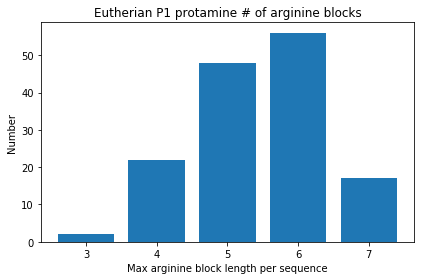

In [24]:
labels, counts = np.unique([int(element) for i,element in enumerate(arg_table.max_block_length.values)],
                           return_counts=True,)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Max arginine block length per sequence')
plt.ylabel('Number')
plt.title('Eutherian P1 protamine # of arginine blocks')
plt.tight_layout()

In [15]:
arg_table.sort_values(by=['average_block_length'],ascending=True)

,P1_sequence,total_blocks,average_block_length,three_block_length,max_block_length
21,MARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRP...,16,1.500000,1,6
19,MARYRCRRSQSRSRCCRQRRRCRRRRRQRFRARKRAMRCCHRRYRL...,17,1.529412,1,5
10,MARYRCCRSQSRSRCYRQRQRSRRRKRQSCQTQRRAMRCCRRRSRM...,15,1.533333,2,4
74,MARNRCCRSQSRSRCRRPKRGCRSRRRRCYQRRRRVCCRRYTTIRCARQ,13,1.615385,0,4
44,MARNRCRSPSQSRCRRPRRRCRRRIRCCRRQRRVCCRRYTTTRCARQ,13,1.615385,2,3
...,...,...,...,...,...
62,MARYRCCRSKSRSRCRRRRRRCRRRRRRCCRRRRRRCCRRRRSYTI...,10,2.800000,0,6
61,MARYRCCRSKSRSRCRRRRRRCRRRRRRCCRRRRRRCCRRRRSYTI...,10,2.800000,0,6
110,MARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVI...,9,2.888889,0,7
6,MARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVI...,9,2.888889,0,7


In [5]:
ep_list

NameError: name 'ep_list' is not defined